# 04.12 - Three-Dimensional Plotting in Matplotlib

Three-dimensional plots are enabled by importing the <code>mplot3d</code> toolkit, included with the main Matplotlib installation:

In [1]:
from mpl_toolkits import mplot3d

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

We can now create three-dimensional axes by passing the keyword <code>projection='3d'</code>:

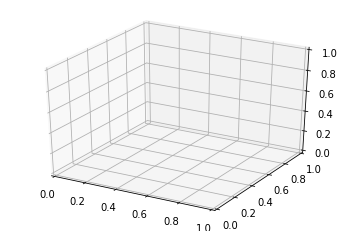

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')

### Three-dimensional Points and Lines

Basic 3d points and lines can be created using the <code>ax.plot3D</code> and <code>ax.scatter3D</code> functions, which borrow a lot from their two-dimensional counterparts:

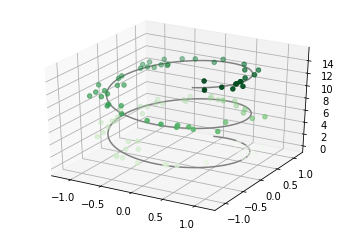

In [12]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

### Three-dimensional Contour Plots

In [13]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

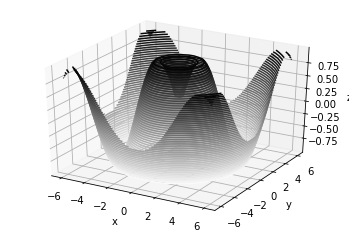

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Sometimes the default viewing angle is not optimal, in which case we can use the <code>view_init</code> method to set the elevation and azimuthal angles.

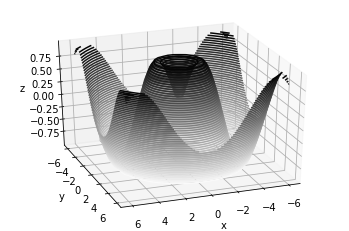

In [27]:
# arg1 deg above x-y plane
# arg2 deg azimuth (rotated 35 degrees counter-clockwise about the z-axis)
ax.view_init(30, 70)
fig

### Wireframes and Surface Plots

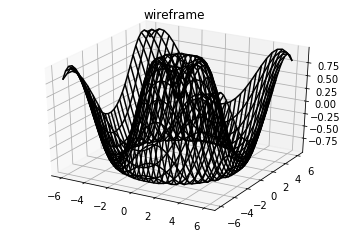

In [28]:
# wireframe

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

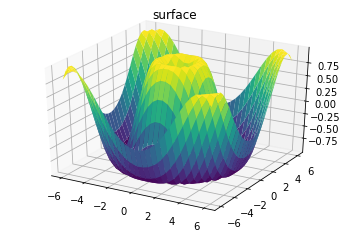

In [29]:
# surface plot

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

Let's now take a _slice_ of another function to see how a section looks like:

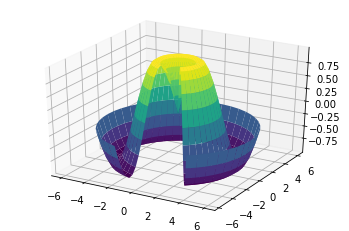

In [31]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

### Surface Triangulations

What if rather than an even draw from a Cartesian or a polar grid, we instead have a set of random draws?

In [32]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

We could create a scatter plot of the points to get an idea of the surface we're sampling from:

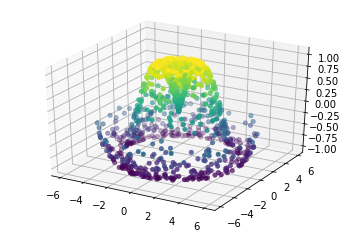

In [33]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

Not very clear. In this case, a useful function can be <code>ax.plot_trisurf</code>, which creates a surface by first finding a set of triangles formed between adjacent points.

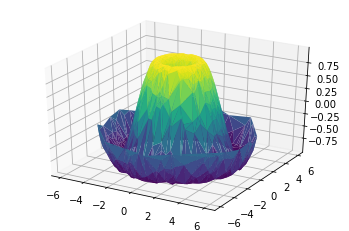

In [34]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');